In [1]:
# Importing some python libraries.
import matplotlib.pyplot as pl
import numpy as np
from numpy.random import randn
import seaborn as sns
%matplotlib inline
# Fixing figure sizes
from pylab import rcParams
rcParams['figure.figsize'] = 10,7

# Homework 2 

A European Put option allows you to sell an asset at time $T$ for a price $k$. In
some way, it is the opposite of the call option discussed in class. It’s payoff is
$\max(k − S_T ,0)$. Use these specifications: $S_0 = 25, \sigma = 1, r = 0.01, K = 25$,and compute the prices of the option at times $T = 1,\ldots, 5$. You don’t need to derive an analytic
solution. It is enough to use one of the proposed approximation methods.

We will need a function that can produce the samples we require. 

In [4]:
def pricingSamples(T, number_of_samples,S0=25, SIGMA=1,
                   R=0.01, K=25):
    '''
        Produces samples of the selling price of an asset at time t=T,
        given the parameters above. 
    '''
    
    z = randn(number_of_samples)
    s_T = S0*np.exp((R-0.5*SIGMA**2)*T+SIGMA*np.sqrt(T)*z)
    c = np.exp(-R*T)*(K-s_T)*((K-s_T)>0)
    return c

Now that we have this function, we can use the samples to compute the expected price at time $T$. 

In [5]:
def PriceOption(T, num_of_samples=10000,S0=25, SIGMA=1,
                   R=0.01, K=25):
    '''
        Computes the expected price at time T given
        samples. 
    '''
    
    samples = pricingSamples(T, num_of_samples)
    aver_price = np.mean(samples)
    return aver_price 

Instead of computing the expected price for the first 5 points, i.e. for $T=1,\ldots,5,$ let us instead do it for the first 100. This shows how the expected price drops after a while. 

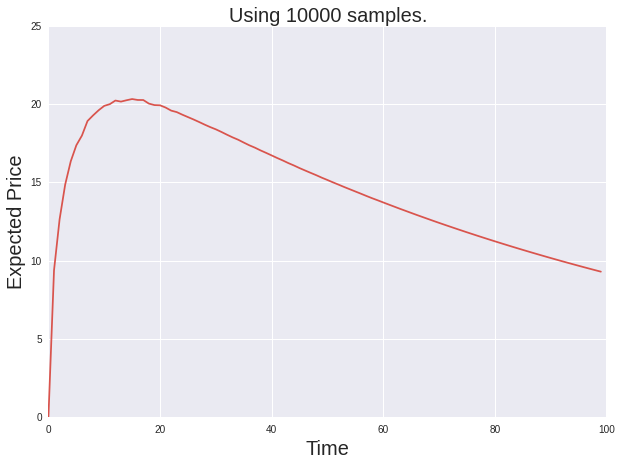

In [9]:
prices = np.zeros(100);
for i in range(1,100):
    prices[i] = PriceOption(i);

pale_red = sns.xkcd_rgb['pale red']    
pl.plot(prices,color=pale_red)
pl.xlabel('Time',fontsize=20)
pl.ylabel('Expected Price',fontsize=20)
pl.title('Using 10000 samples.', fontsize=20)